## Обзор основных форматов для задачи детекции

Ноутбук состоит из двух частей:
1. Разбор описания ббоксов на примере датасетов-бенчмарков и не только:
    * Pascal VOC
    * COCO
    * Open Images
    * YOLO
2. Как можно написать детектор за пару строчек кода используя готовые реализации:
    * TorchVision
    * Ultralytics
    * Detectron2
    * mmdetection

### Pascal VOC format
Это один из самых первых форматов.

Для аннотации используется XML:
```XML
<annotation>
    <filename>000001.jpg</filename>
    <size>
        <width>500</width>
        <height>375</height>
        <depth>3</depth>
    </size>
    <segmented>0</segmented>
    <object>
        <name>helmet</name>
        <pose>Unspecified</pose>
        <truncated>0</truncated>
        <difficult>0</difficult>
        <occluded>0</occluded>
        <bndbox>
            <xmin>179</xmin>
            <ymin>85</ymin>
            <xmax>231</xmax>
            <ymax>144</ymax>
        </bndbox>
    </object>
</annotation>
```

### COCO 2017 dataset 

Давайте посмотрим на то как выглядит датасет COCO (При желании можете его скачать ~20гб)

Весь датасет лежит вот тут: https://cocodataset.org/#download. 

Инструкция для желающих:

Разметка существует для двух частей датасета: `train` и `val`, скачать их можно по ссылкам ниже:
```
!wget http://images.cocodataset.org/zips/train2017.zip
!wget http://images.cocodataset.org/zips/val2017.zip
!wget http://images.cocodataset.org/annotations/annotations_trainval2017.zip
```
`annotations_tranval2017` это файл с разметкой для данных из трейна и валидации.

При желании, можете скачать тестовые данные:
```
!wget http://images.cocodataset.org/zips/test2017.zip
```

Затем, расархивируем скаченные данные:

```
!unzip train2017.zip
!unzip val2017.zip
!unzip annotations_trainval2017.zip
```

Можно создать отдельную папку для датасета и сложить всю датку туда:

```
!mkdir coco
!mv train2017 coco/
!mv val2017 coco/
```

Давайте посмотрим что за данные там лежат и в каком формате

In [ ]:
# Если запускаете в colab
# !pip install pycocotools

In [ ]:
import numpy as np
from pycocotools.coco import COCO

Структура аннотаций следующая:

In [ ]:
!ls -l datasets/coco/annotations

In [ ]:
coco=COCO("datasets/coco/annotations/instances_val2017.json")

Посмотрим на картинку с аннтоацией

In [ ]:
import skimage.io as io
import matplotlib.pyplot as plt

# Чтобы посмотреть примеры, нам не нужно скачивать датасет!
img = coco.loadImgs(84492)[0]
I = io.imread(img['coco_url'])
plt.imshow(I); plt.axis('off')

annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)
coco.showAnns(anns, draw_bbox=True)

Cам файл с аннтацией выглядит следующим образом:

In [ ]:
anns[0]

А вот общая структура COCO аннотаций:

```json
{
    "images": [
        {
            "id": 0,
            "file_name": "0001.jpg",
            "width": 490,
            "height": 275
        }
    ],
    "annotations": [
        {
            "id": 0,
            "image_id": 0,
            "category_id": 2,
            "bbox": [45, 2, 85, 85],
            "area": 7225,
            "segmentation": [],
            "iscrowd": 0
        },
        {
            "id": 1,
            "image_id": 0,
            "category_id": 2,
            "bbox": [324, 29, 72, 81],
            "area": 5832,
            "segmentation": [],
            "iscrowd": 0
        }
    ],
    "categories": [
        { "id": 0, "name": "Workers", "supercategory": "none" },
        { "id": 1, "name": "head",    "supercategory": "Workers" },
        { "id": 2, "name": "helmet",  "supercategory": "Workers" }
    ]
}
```

### Open Images

Формат датасета Open Images - CSV-аннотации в одном или нескольких файлах:
* Формат ббоксов:
```csv
ImageID,Source,LabelName,Confidence,XMin,XMax,YMin,YMax,IsOccluded,IsTruncated,IsGroupOf,IsDepiction,IsInside,XClick1X,XClick2X,XClick3X,XClick4X,XClick1Y,XClick2Y,XClick3Y,XClick4Y
000002b66c9c498e,xclick,/m/04bcr3,1,0.312500,0.578125,0.351562,0.464063,0,0,0,0,0,0.312500,0.578125,0.385937,0.576562,0.454688,0.364063,0.351562,0.464063
3550e6ef5d44d91a,activemil,/m/0220r2,1,0.022461,0.865234,0.234375,0.986979,1,0,0,0,0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
880b4b00f75260ec,xclick,/m/0ch_cf,1,0.641875,0.693125,0.818333,0.878333,1,0,0,0,0,0.641875,0.643125,0.678750,0.693125,0.818333,0.842500,0.871667,0.878333
b17e3f11cb77c7c8,xclick,/m/0dzct,1,0.510156,0.664844,0.337632,0.623681,1,0,0,0,0,0.573438,0.510156,0.664844,0.587500,0.337632,0.438453,0.468933,0.623681
```

Каждая строчка - отдельный ббокс.

* Изображения и классы:
Классы лежат в csv-файле , в котором есть класс и ID картики. Сами картинки это JPEG которые лежат по разным директориям (train/val/test)

### YOLO

Самый простой формат - для каждого файла, аннотации хранятся в отдельном файле `.TXT`.

Формат файла:
```
<class_id> <x_center> <y_center> <width> <height>
```
Пример:
`img_id.txt`
```
1 0.408 0.3027 0.104 0.1573
1 0.245 0.4240 0.046 0.0800
```

#### Ultralytics YOLO format

Из туториала по датасетам [[ссылка](https://docs.ultralytics.com/datasets/detect/)]

В качестве датасета Ultralytics принимает yaml файл со следующей структурой:
```
# Train/val/test sets as 1) dir: path/to/imgs, 2) file: path/to/imgs.txt, or 3) list: [path/to/imgs1, path/to/imgs2, ..]

path: ../datasets/coco8 # dataset root dir (absolute or relative; if relative, it's relative to default datasets_dir)
train: images/train # train images (relative to 'path') 4 images
val: images/val # val images (relative to 'path') 4 images
test: # test images (optional)

# Classes (80 COCO classes)
names:
    0: person
    1: bicycle
    2: car
    # ...
    77: teddy bear
    78: hair drier
    79: toothbrush
```
Пример датасета:
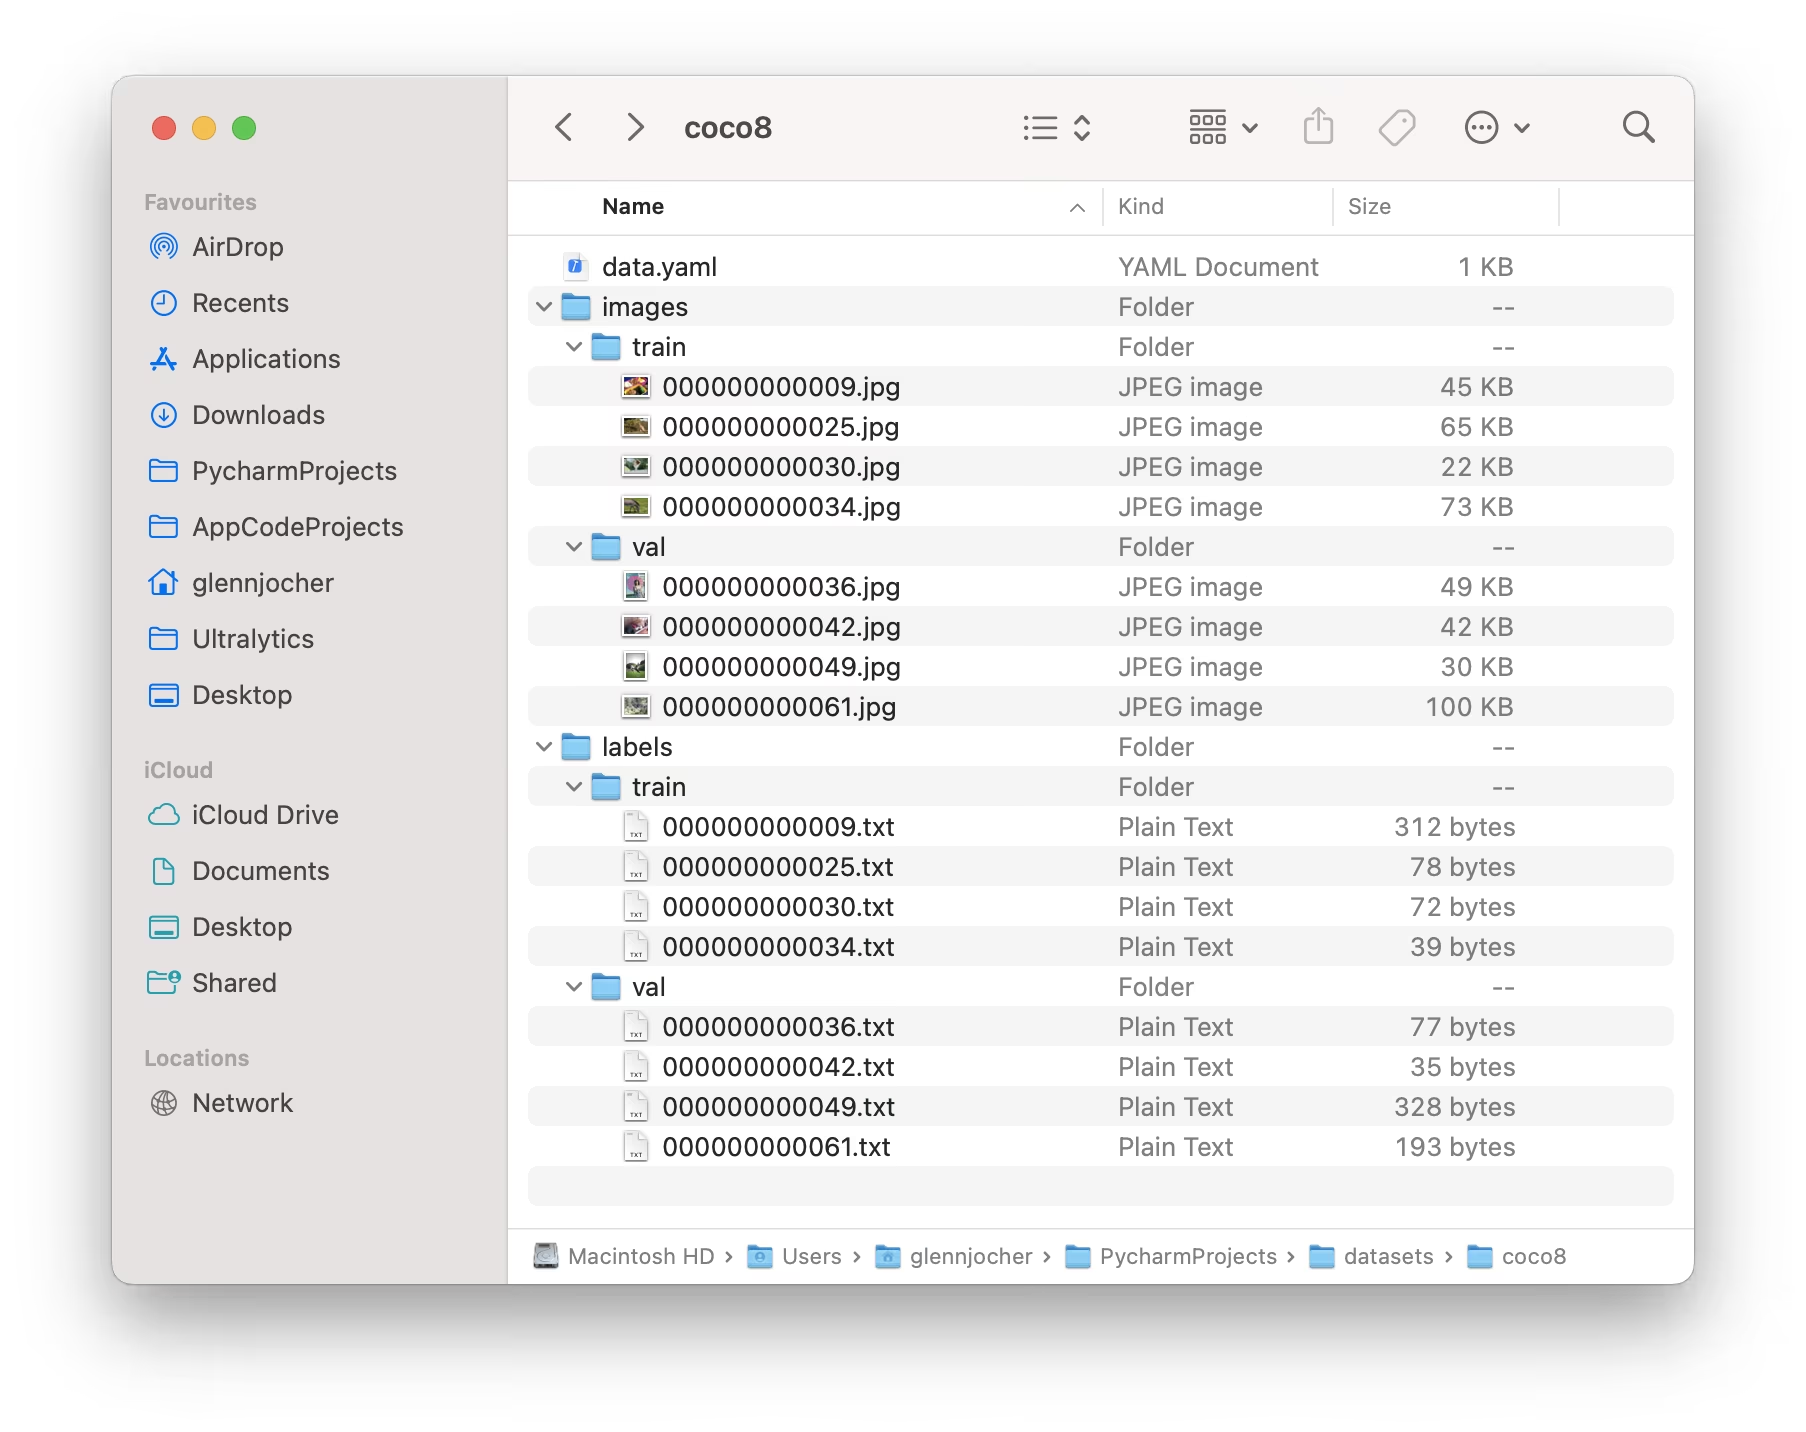

## Пишем детектор за пару строк кода
### TorchVision

#### Инференс

In [ ]:
import matplotlib.pyplot as plt
import torch, torchvision
from torchvision import transforms
from torchvision.utils import draw_bounding_boxes, draw_segmentation_masks

from PIL import Image


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Загружаем модель fasterrcnn с бекбоуном resnet50
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(weights="DEFAULT")
model.eval().to(device)

# Открваем любое изображение
# image = Image.open("image.jpg")
# Возмем изображение из COCO
image = np.array(I)
img_tensor = transforms.ToTensor()(image).to(device)

# Делаем инференс модели
with torch.no_grad():
    outputs = model([img_tensor])

# Извлекаем предсказанные рамки, метки и скоры для первого изображения
pred_boxes = outputs[0]['boxes']
pred_scores = outputs[0]['scores']
pred_labels = outputs[0]['labels']
print("Detected", len(pred_boxes), "objects")

Нарисуем предсказанные ббоксы:

In [ ]:
def plot_boxes(torch_img, torch_boxes_xyxy):
    image = (255.0 * (torch_img - torch_img.min()) / (torch_img.max() - torch_img.min())).to(torch.uint8)
    image = image[:3, ...]
    output_image = draw_bounding_boxes(image, torch_boxes_xyxy.long(), None)
    
    plt.figure(figsize=(10, 6))
    plt.imshow(output_image.permute(1, 2, 0))

In [ ]:
plot_boxes(img_tensor, pred_boxes)

#### Дообучение

In [ ]:
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor

# Заменяем голову (классификатор) у pre-trained Faster R-CNN и меняем у неё количество классов на нужное нам
num_classes = 3  # например, 2 класса + фон
in_features = model.roi_heads.box_predictor.cls_score.in_features
model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes).to(device)

# Оптимизатор
optimizer = torch.optim.SGD(model.parameters(), lr=0.005, momentum=0.9)

num_epochs = 10
train_loader = # YOUR BEST TRAIN LOADER
model.train()
for epoch in range(num_epochs):
    for images, targets in train_loader:
        images = images.to(device)
        # при необходимости можем перенести таргеты на GPU
        targets = [{k: v.to(device) for k, v in t.items()} for t in targets]

        # обучаем модель
        loss_dict = model(images, targets)
        total_loss = sum(loss for loss in loss_dict.values())
        optimizer.zero_grad()
        total_loss.backward()
        optimizer.step()
        print(f"total loss: {total_loss}")

Плюсы:
* Из коробки рабочий детектор на торче, удобно кастомизировать,
* Обучается как любая другая torch модель.

Минусы:
* Небольшой выбор реализованных моделей,
* Возможно, придется много реализовывать самостоятельно.

### Ultralytics
[[github](https://github.com/ultralytics/ultralytics)]

In [ ]:
# !pip install ultralytics

In [ ]:
from ultralytics import YOLO

# Скачали маленькую YOLOv8 в одну строчку
model = YOLO("yolov8n.pt").to(device)

#### Инференс

In [ ]:
image = np.array(I)
img_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((640, 640)),
])
img_tensor = img_transforms(image).to(device)
results = model(img_tensor[None,])

In [ ]:
# ббоксы на изображении
results[0].boxes

In [ ]:
plot_boxes(img_tensor, results[0].boxes.xyxy)

#### Обучение

In [ ]:
# задаем описание датасета в yaml и обучаем модель.

results = model.train(data="my_dataset.yaml", epochs=10, batch=8, device=0)

Плюсы: 
* Простота использования,
* Быстрые и качественные модели,
* Простой и понятный формат аннотаций,
* Хорошая экосистема, в которой есть все для обучения и деплоя:
    * Автоматические расчеты статистик по датасету,
    * Подключение clearml во время обучения ([link](https://www.ultralytics.com/blog/remotely-train-and-monitor-yolov5-using-clearml))
    * Логирование в процессе обучения, можно просматривать ббоксы на различных итерациях обучения ([link](https://docs.wandb.ai/guides/integrations/ultralytics/))
    * Прекомит хуки ([link](https://github.com/ultralytics/pre-commit))

Минусы:
* Сосредоточены именно на YOLO моделях, мало других детекторов
* Низкая возможность кастомизации моделей.

### Detectron2

Это библиотека от Facebook AI Research [[github](https://github.com/facebookresearch/detectron2)], colab tutorial [[link](https://colab.research.google.com/drive/16jcaJoc6bCFAQ96jDe2HwtXj7BMD_-m5)].

Быстрая установка библиотеки:
```
!python -m pip install pyyaml==5.1
import sys, os, distutils.core
# Note: This is a faster way to install detectron2 in Colab, but it does not include all functionalities (e.g. compiled operators).
# See https://detectron2.readthedocs.io/tutorials/install.html for full installation instructions
!git clone 'https://github.com/facebookresearch/detectron2'
dist = distutils.core.run_setup("./detectron2/setup.py")
!python -m pip install {' '.join([f"'{x}'" for x in dist.install_requires])}
sys.path.insert(0, os.path.abspath('./detectron2'))
```

ИЛИ

Полная установка
```
!python -m pip install 'git+https://github.com/facebookresearch/detectron2.git'
```

In [ ]:
# раскомментировать в коллабе!
# from google.colab.patches import cv2_imshow

from detectron2.utils.visualizer import Visualizer
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg

# Снова берем картинку из COCO
image = np.array(I)

# Библиотека использует конфиги. Давайте создадим самый простой конфиг 
cfg = get_cfg()
cfg.merge_from_file("configs/COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml")
cfg.MODEL.WEIGHTS = "detectron2://COCO-Detection/faster_rcnn_R_50_FPN_3x/137849458/model_final_280758.pkl"
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # порог уверенности
cfg.MODEL.DEVICE = device

# Создаем предиктор и выполняем предсказание
predictor = DefaultPredictor(cfg)
outputs = predictor(image)

# Достаем предсказанные боксы, классы и оценки
instances = outputs["instances"].to("cpu")
print("Number of detectins", len(instances.pred_boxes))
print(instances.pred_boxes, instances.scores, instances.pred_classes)

In [ ]:
v = Visualizer(image[:, :, ::-1], scale=1.2)
out = v.draw_instance_predictions(outputs["instances"].to(device))
cv2_imshow(out.get_image()[:, :, ::-1])

#### Инференс
Чтобы сделать инференс на своем датасете его нужно зарегистрировать:
```
# DatasetCatalog.register("my_dataset_train", <функция загрузки аннотаций>)
# MetadataCatalog.get("my_dataset_train").set(thing_classes=["класс1", "класс2", ...])
```

Если датасет в COCO формате, можно написать:

```
# from detectron2.data.datasets import register_coco_instances
# register_coco_instances("my_dataset_train", {}, "json_annotation_train.json", "path/to/image/dir")
# register_coco_instances("my_dataset_val", {}, "json_annotation_val.json", "path/to/image/dir")
```

In [ ]:
# далее создаем конфиг для обучения

cfg = get_cfg()
# в библиотеке есть папка с конфигами дефолтных моделей
cfg.merge_from_file("configs/COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml")
cfg.DATASETS.TRAIN = ("my_dataset_train",)
cfg.DATASETS.TEST = ()  # можно указать validation датасет
cfg.DATALOADER.NUM_WORKERS = 2
cfg.MODEL.WEIGHTS = "detectron2://COCO-Detection/faster_rcnn_R_50_FPN_3x/137849458/model_final_280758.pkl"
cfg.SOLVER.IMS_PER_BATCH = 4
cfg.SOLVER.BASE_LR = 0.00025
cfg.SOLVER.MAX_ITER = 1000 
cfg.MODEL.ROI_HEADS.NUM_CLASSES = num_classes  # кол-во классов (без фона)

trainer = DefaultTrainer(cfg)
trainer.resume_or_load(resume=False)
trainer.train()

Плюсы:
* Разнообразные модели (правда уже старые и в основном Faster R-CNN-based модели),
* Большая возможность кастомизации с помощью конфигов
* Поддерживает всякие оптимизации (Mixed Precision Training, Multi-GPU / Multi-Node)
* Может работать с кастомными датасетами не только для задачи детекции

Минусы:
* Высокий порог входа,
* Требователен к ресурсам

### mmdetection 
[[github](https://github.com/open-mmlab/mmdetection)]

Можно сказать что это улучшенная версия Detectron2
#### Инференс

In [ ]:
from mmdet.apis import init_detector, inference_detector

config_file = "configs/rtmdet/rtmdet_tiny_8xb32-300e_coco.py"
checkpoint_file = "checkpoints/rtmdet_tiny_coco.pth"

# Инициализируем модель (загружает архитектуру и веса на GPU)
model = init_detector(config_file, checkpoint_file, device=device)

# Выполняем инференс на изображении
image = np.array(I)
result = inference_detector(model, img)

# Результат - список numpy-массивов с координатами и вероятностями для каждого класса
print(result)

In [ ]:
# сохранить предсказание в файл
model.show_result(img, result, out_file="res.jpg")

#### Train
Обучение обычно происходит через командную строку. Мы должны создать конфиг файл и передать его в качестве аргумента для метода train.

Конфиг в mmdetection это `.py` файл следующей структуры:
```py
_base_ = "./faster_rcnn_r50_fpn_1x_coco.py"
num_classes = 3

model = dict(
    roi_head=dict(
        bbox_head=dict(num_classes=num_classes),
    )
)

dataset_type = "COCODataset"
data = dict(
    train=dict(
        img_prefix="data/train/",
        ann_file="data/train/annotations.json",
    ),
    val=dict(
        img_prefix="data/val/",
        ann_file="data/val/annotations.json",
    ),
)
```

In [ ]:
# затем выполняем скрипт
!mim train mmdet path/to/my_config.py --gpu-id 0 --work-dir ./work_dirs/my_model

Плюсы:
* Один из самых мощных фрейморков для обучения моделей,
* Поддерживает ещё больше моделей,
    * Есть real-time модели типа YOLO
* python конфиги более удобный и гибкий инструмент для описания моделей,
* Удобная поддержка кастомных датасетов (не нужно их регистрировать как в Detectron2),

Минусы:
* Ещё больше порог входа.